# Initialization
These snippets define the model, dataset, hyperparameters, and training loop

In [1]:
# Imports and initialization
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch
import torch.optim as optim
torch.set_printoptions(edgeitems=2, linewidth=75)

In [2]:
# Model wrapper to call linear or quadratic model as needed
def model(t_u, params):
    if len(params) == 2:
        return model_lin(t_u, *params)
    elif len(params) == 3:
        return model_quad(t_u, *params)
    else:
        return None

# Linear (baseline) model
def model_lin(t_u, w, b):
    return w*t_u + b

# Quadratic model
def model_quad(t_u, w2, w1, b):
    return w2*t_u**2 + w1*t_u + b

# Simple MSE loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [3]:
# Dataset
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

In [4]:
# Constant hyperparameters
lr = 1e-2
n = 5000

In [5]:
# Training loop from textbook with addition of loss tracking
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    losses = []
    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, params) 
        loss = loss_fn(t_p, t_c)
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            losses.append((epoch, loss))
            
    return params, losses

# SGD Analysis
Run training with SGD on both the linear and quadratic models

In [6]:
# Run linear with SGD
params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=lr)

params_lin_SGD, loss_lin_SGD = training_loop(
    n_epochs = n, 
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 7.860120
Epoch 1000, Loss 3.828538
Epoch 1500, Loss 3.092191
Epoch 2000, Loss 2.957698
Epoch 2500, Loss 2.933134
Epoch 3000, Loss 2.928648
Epoch 3500, Loss 2.927830
Epoch 4000, Loss 2.927679
Epoch 4500, Loss 2.927652
Epoch 5000, Loss 2.927647


### Note:
SGD wouldn't converge on the quadratic model with the given hyperparameters. Instead, it was decreased to 1e-4 for this experiment.

In [11]:
# Run quadratic with SGD
params = torch.tensor([0.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=1e-4)

params_quad_SGD, loss_quad_SGD = training_loop(
    n_epochs = n,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 11.628112
Epoch 1000, Loss 9.293488
Epoch 1500, Loss 7.631711
Epoch 2000, Loss 6.448539
Epoch 2500, Loss 5.605815
Epoch 3000, Loss 5.005253
Epoch 3500, Loss 4.576953
Epoch 4000, Loss 4.271185
Epoch 4500, Loss 4.052580
Epoch 5000, Loss 3.895977


## Visualization
Generate figures for SGD results

In [14]:
# Generate points to visualize models
x = np.linspace(2, 8, 200) # 200 points from 2 to 8 (20 to 80, * 0.1)
t_p_lin_SGD = model(x, params_lin_SGD.detach())
t_p_quad_SGD = model(x, params_quad_SGD.detach())

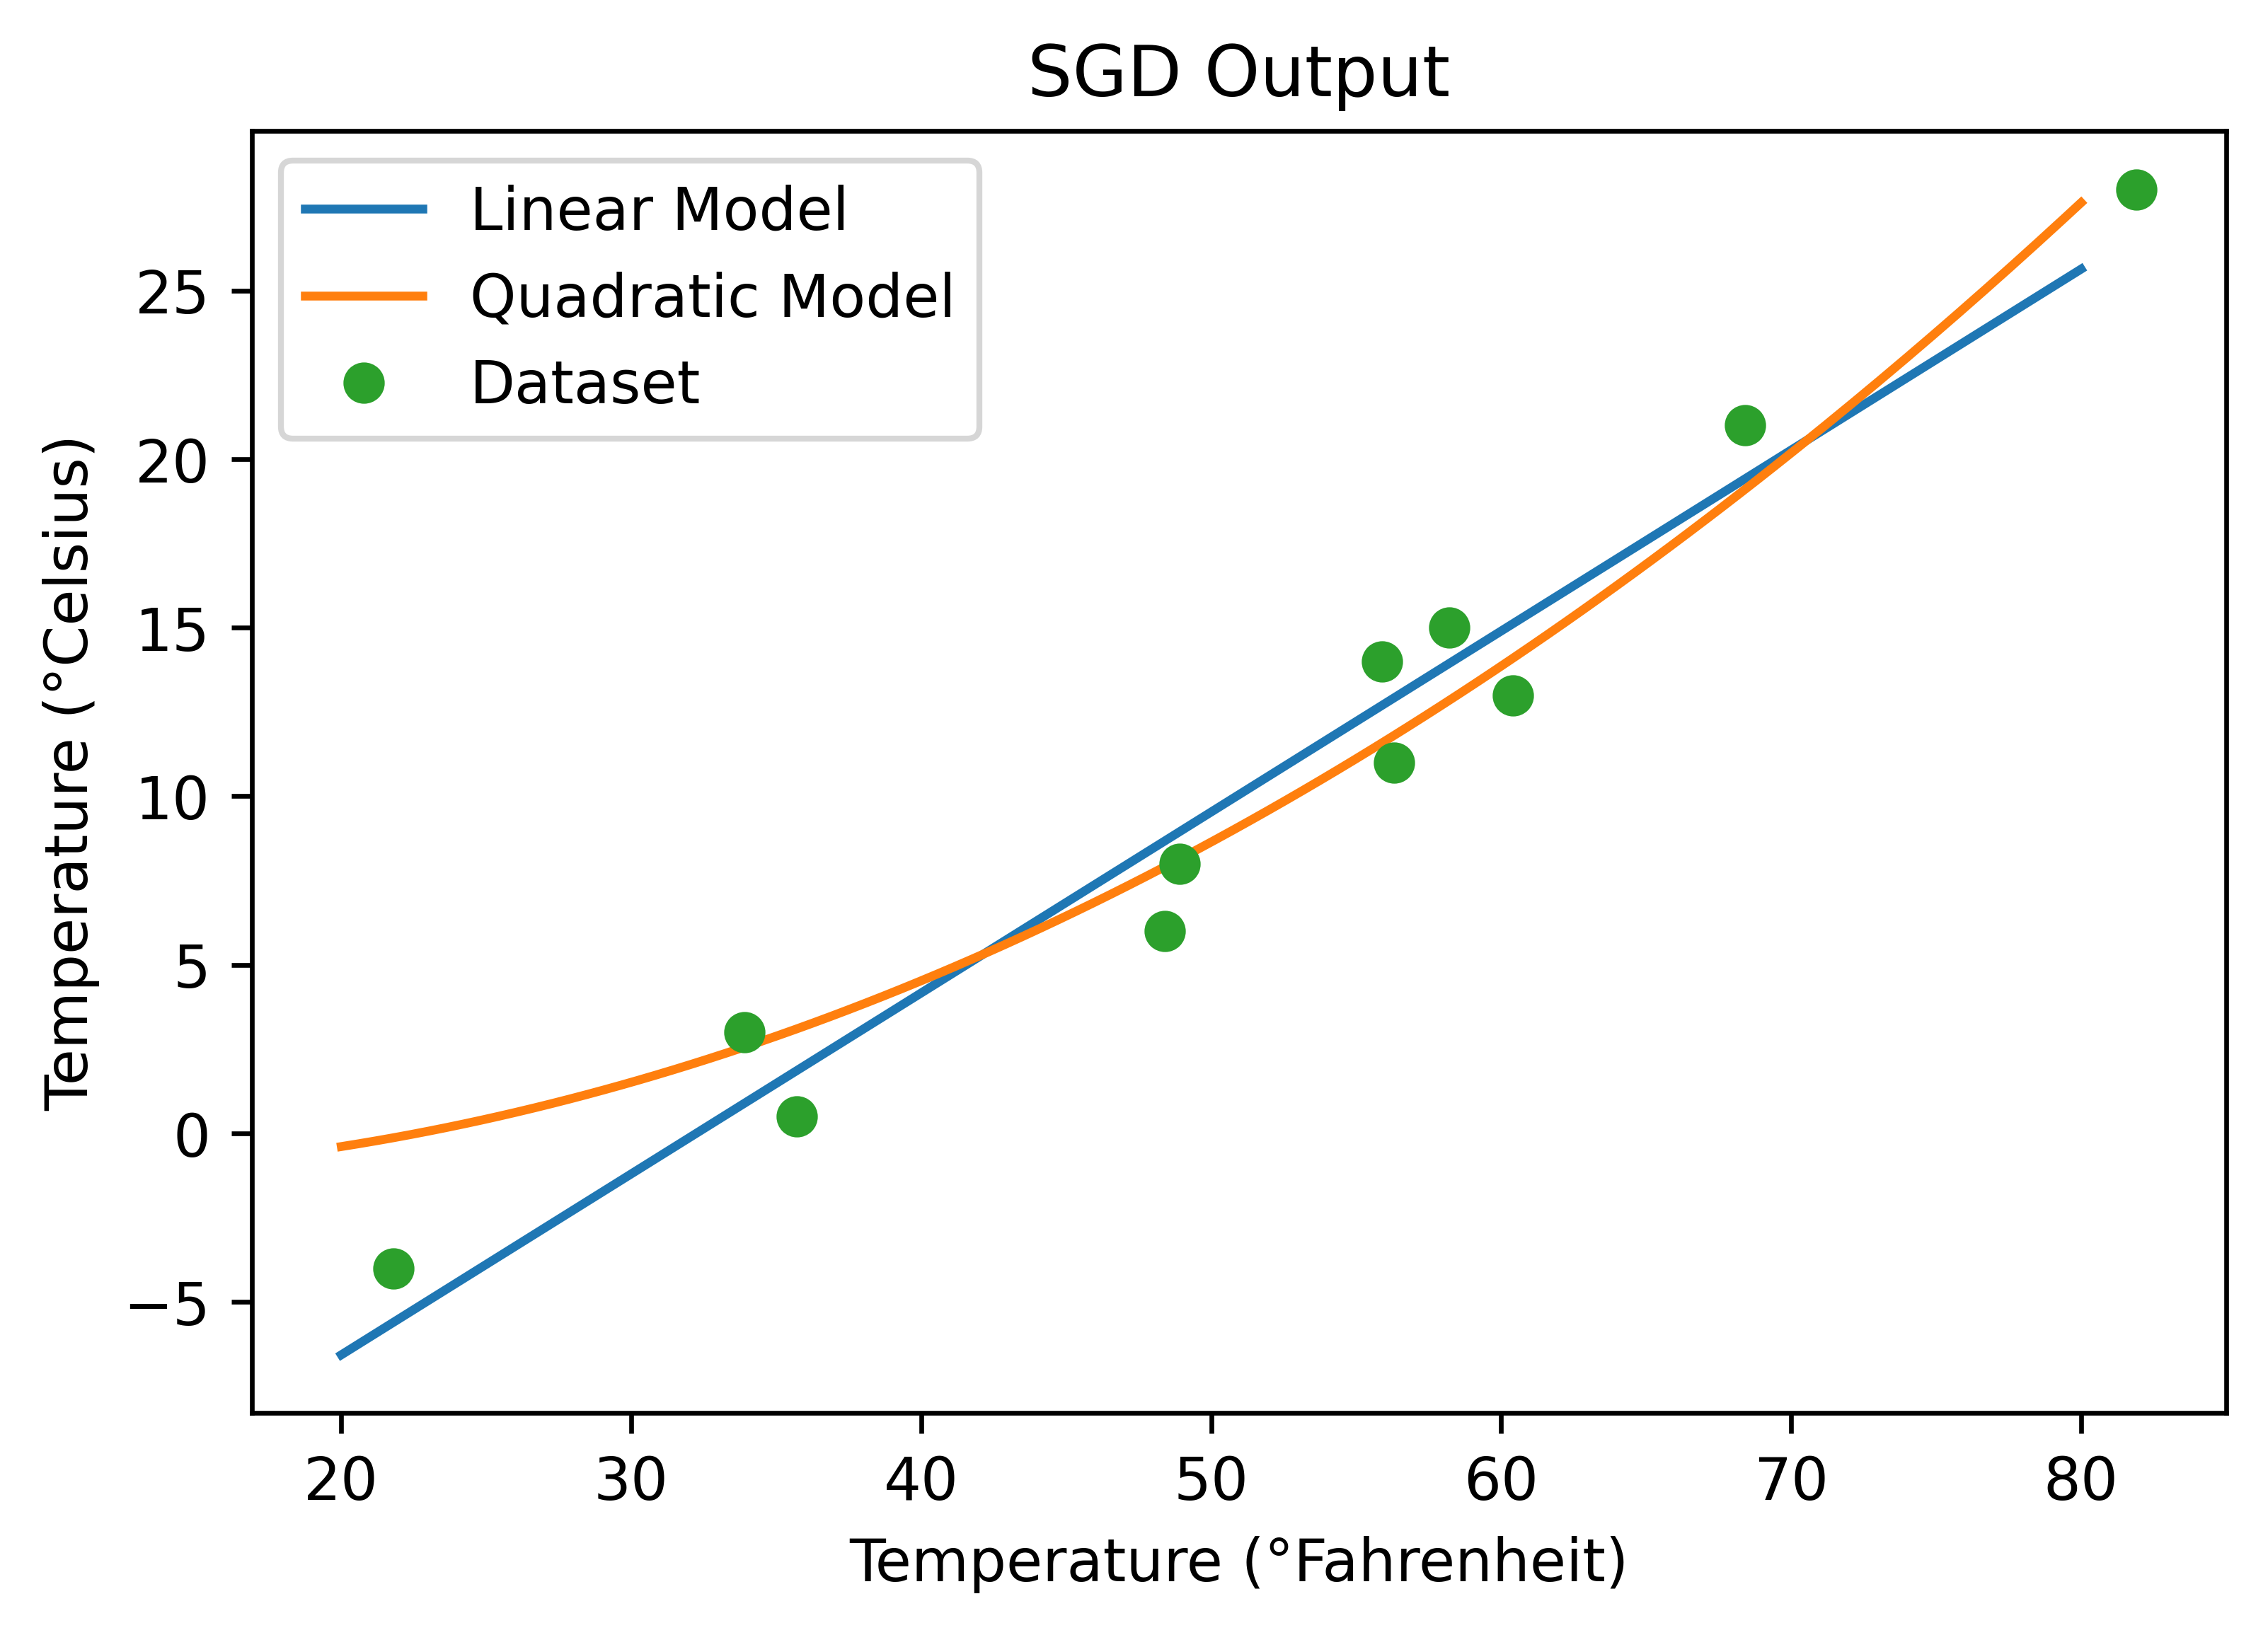

In [15]:
# Set up figure for model outputs
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
lin, = plt.plot(x*10, t_p_lin_SGD.detach().numpy())  # Plot linear model
quad, = plt.plot(x*10, t_p_quad_SGD.detach().numpy()) # Plot quadratic model
data, = plt.plot(t_u.numpy(), t_c.numpy(), 'o')        # Plot dataset
plt.legend([lin, quad, data], ['Linear Model', 'Quadratic Model', 'Dataset'])
plt.title("SGD Output")
plt.savefig("SGD results.png", format="png")

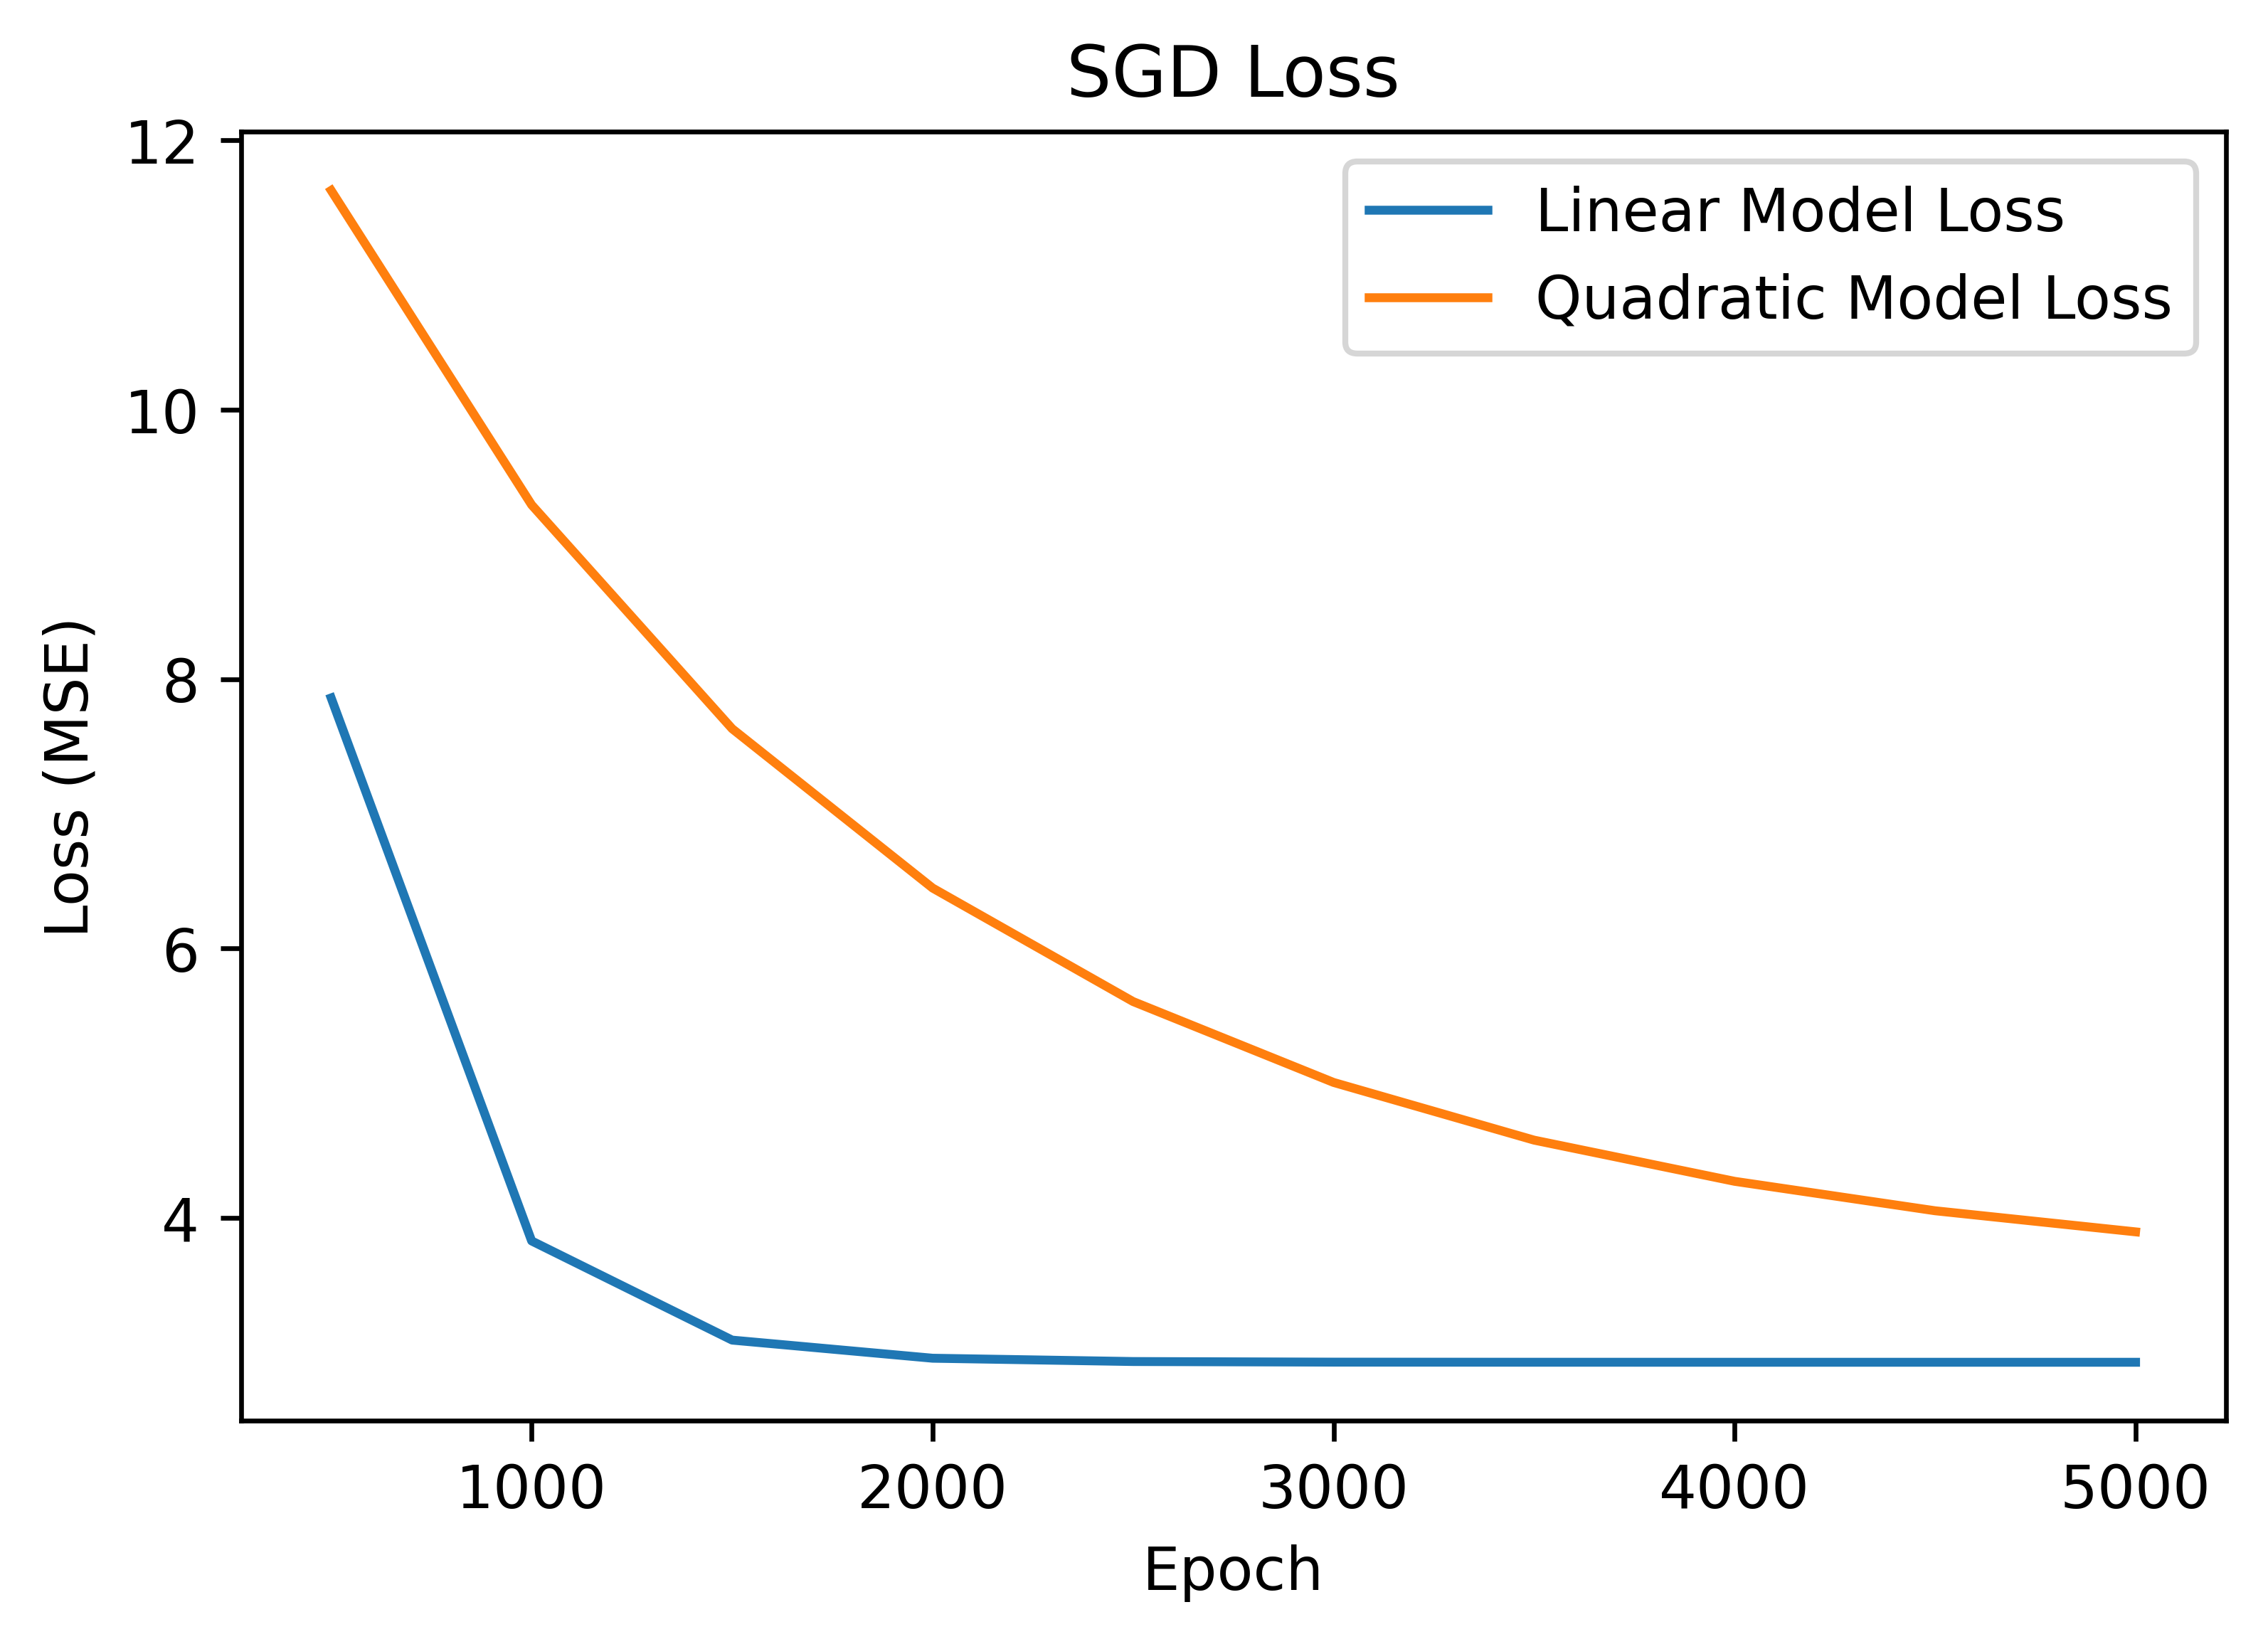

In [16]:
# Set up figure for loss visualization
fig = plt.figure(dpi=600)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
lin, = plt.plot(*zip(*loss_lin_SGD))  # Plot linear loss
quad, = plt.plot(*zip(*loss_quad_SGD)) # Plot quadratic loss
plt.legend([lin, quad], ['Linear Model Loss', 'Quadratic Model Loss'])
plt.title("SGD Loss")
plt.savefig("SGD loss.png", format="png")

# Adam Analysis
Run training with Adam on both the linear and quadratic models

In [17]:
# Run linear with Adam
params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=lr)

params_lin_Adam, loss_lin_Adam = training_loop(
    n_epochs = n, 
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 24.946461
Epoch 1000, Loss 15.752771
Epoch 1500, Loss 9.455151
Epoch 2000, Loss 5.767541
Epoch 2500, Loss 3.932838
Epoch 3000, Loss 3.196812
Epoch 3500, Loss 2.977151
Epoch 4000, Loss 2.933181
Epoch 4500, Loss 2.927968
Epoch 5000, Loss 2.927654


In [18]:
# Run quadratic with Adam
params = torch.tensor([0.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=lr)

params_quad_Adam, loss_quad_Adam = training_loop(
    n_epochs = n,
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 500, Loss 3.535804
Epoch 1000, Loss 2.841011
Epoch 1500, Loss 2.733004
Epoch 2000, Loss 2.610180
Epoch 2500, Loss 2.482250
Epoch 3000, Loss 2.361174
Epoch 3500, Loss 2.258173
Epoch 4000, Loss 2.180982
Epoch 4500, Loss 2.131480
Epoch 5000, Loss 2.105383


## Visualization
Generate figures for Adam results

In [19]:
# Generate points to visualize models
x = np.linspace(2, 8, 200) # 200 points from 2 to 8 (20 to 80, * 0.1)
t_p_lin_Adam = model(x, params_lin_Adam.detach())
t_p_quad_Adam = model(x, params_quad_Adam.detach())

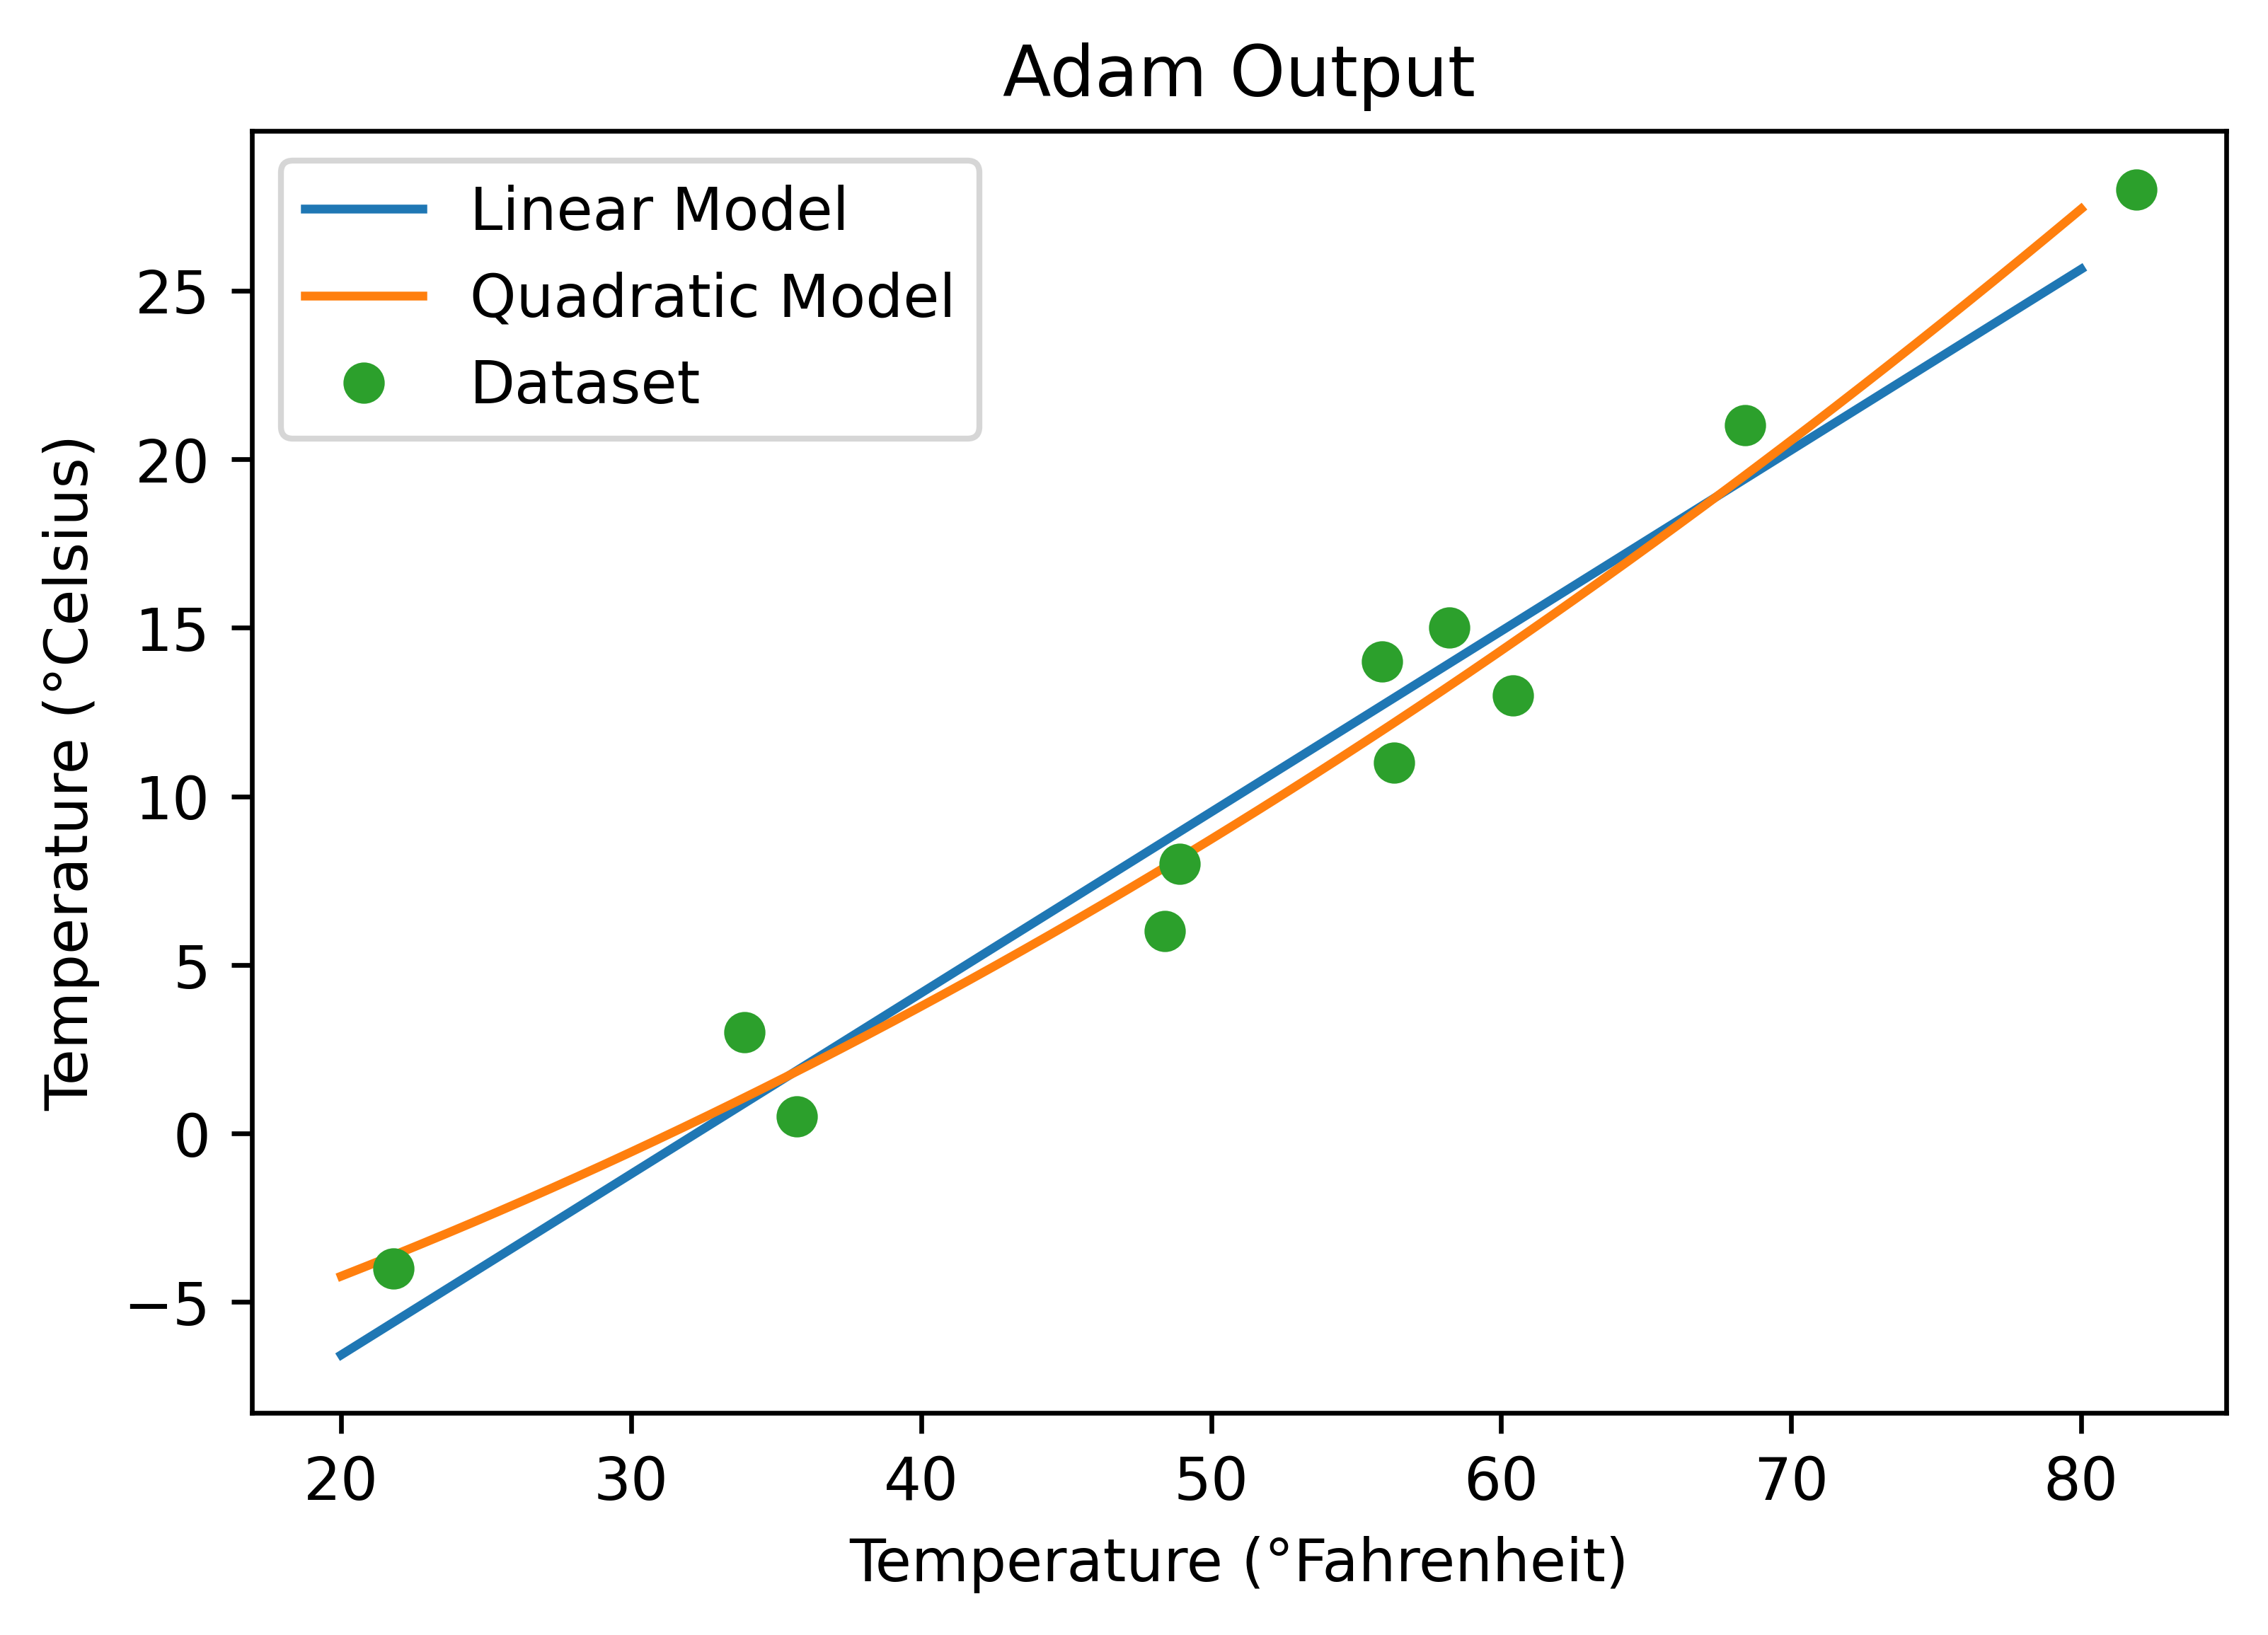

In [20]:
# Set up figure for model outputs
fig = plt.figure(dpi=600)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
lin, = plt.plot(x*10, t_p_lin_Adam.detach().numpy())  # Plot linear model
quad, = plt.plot(x*10, t_p_quad_Adam.detach().numpy()) # Plot quadratic model
data, = plt.plot(t_u.numpy(), t_c.numpy(), 'o')        # Plot dataset
plt.legend([lin, quad, data], ['Linear Model', 'Quadratic Model', 'Dataset'])
plt.title("Adam Output")
plt.savefig("Adam results.png", format="png")

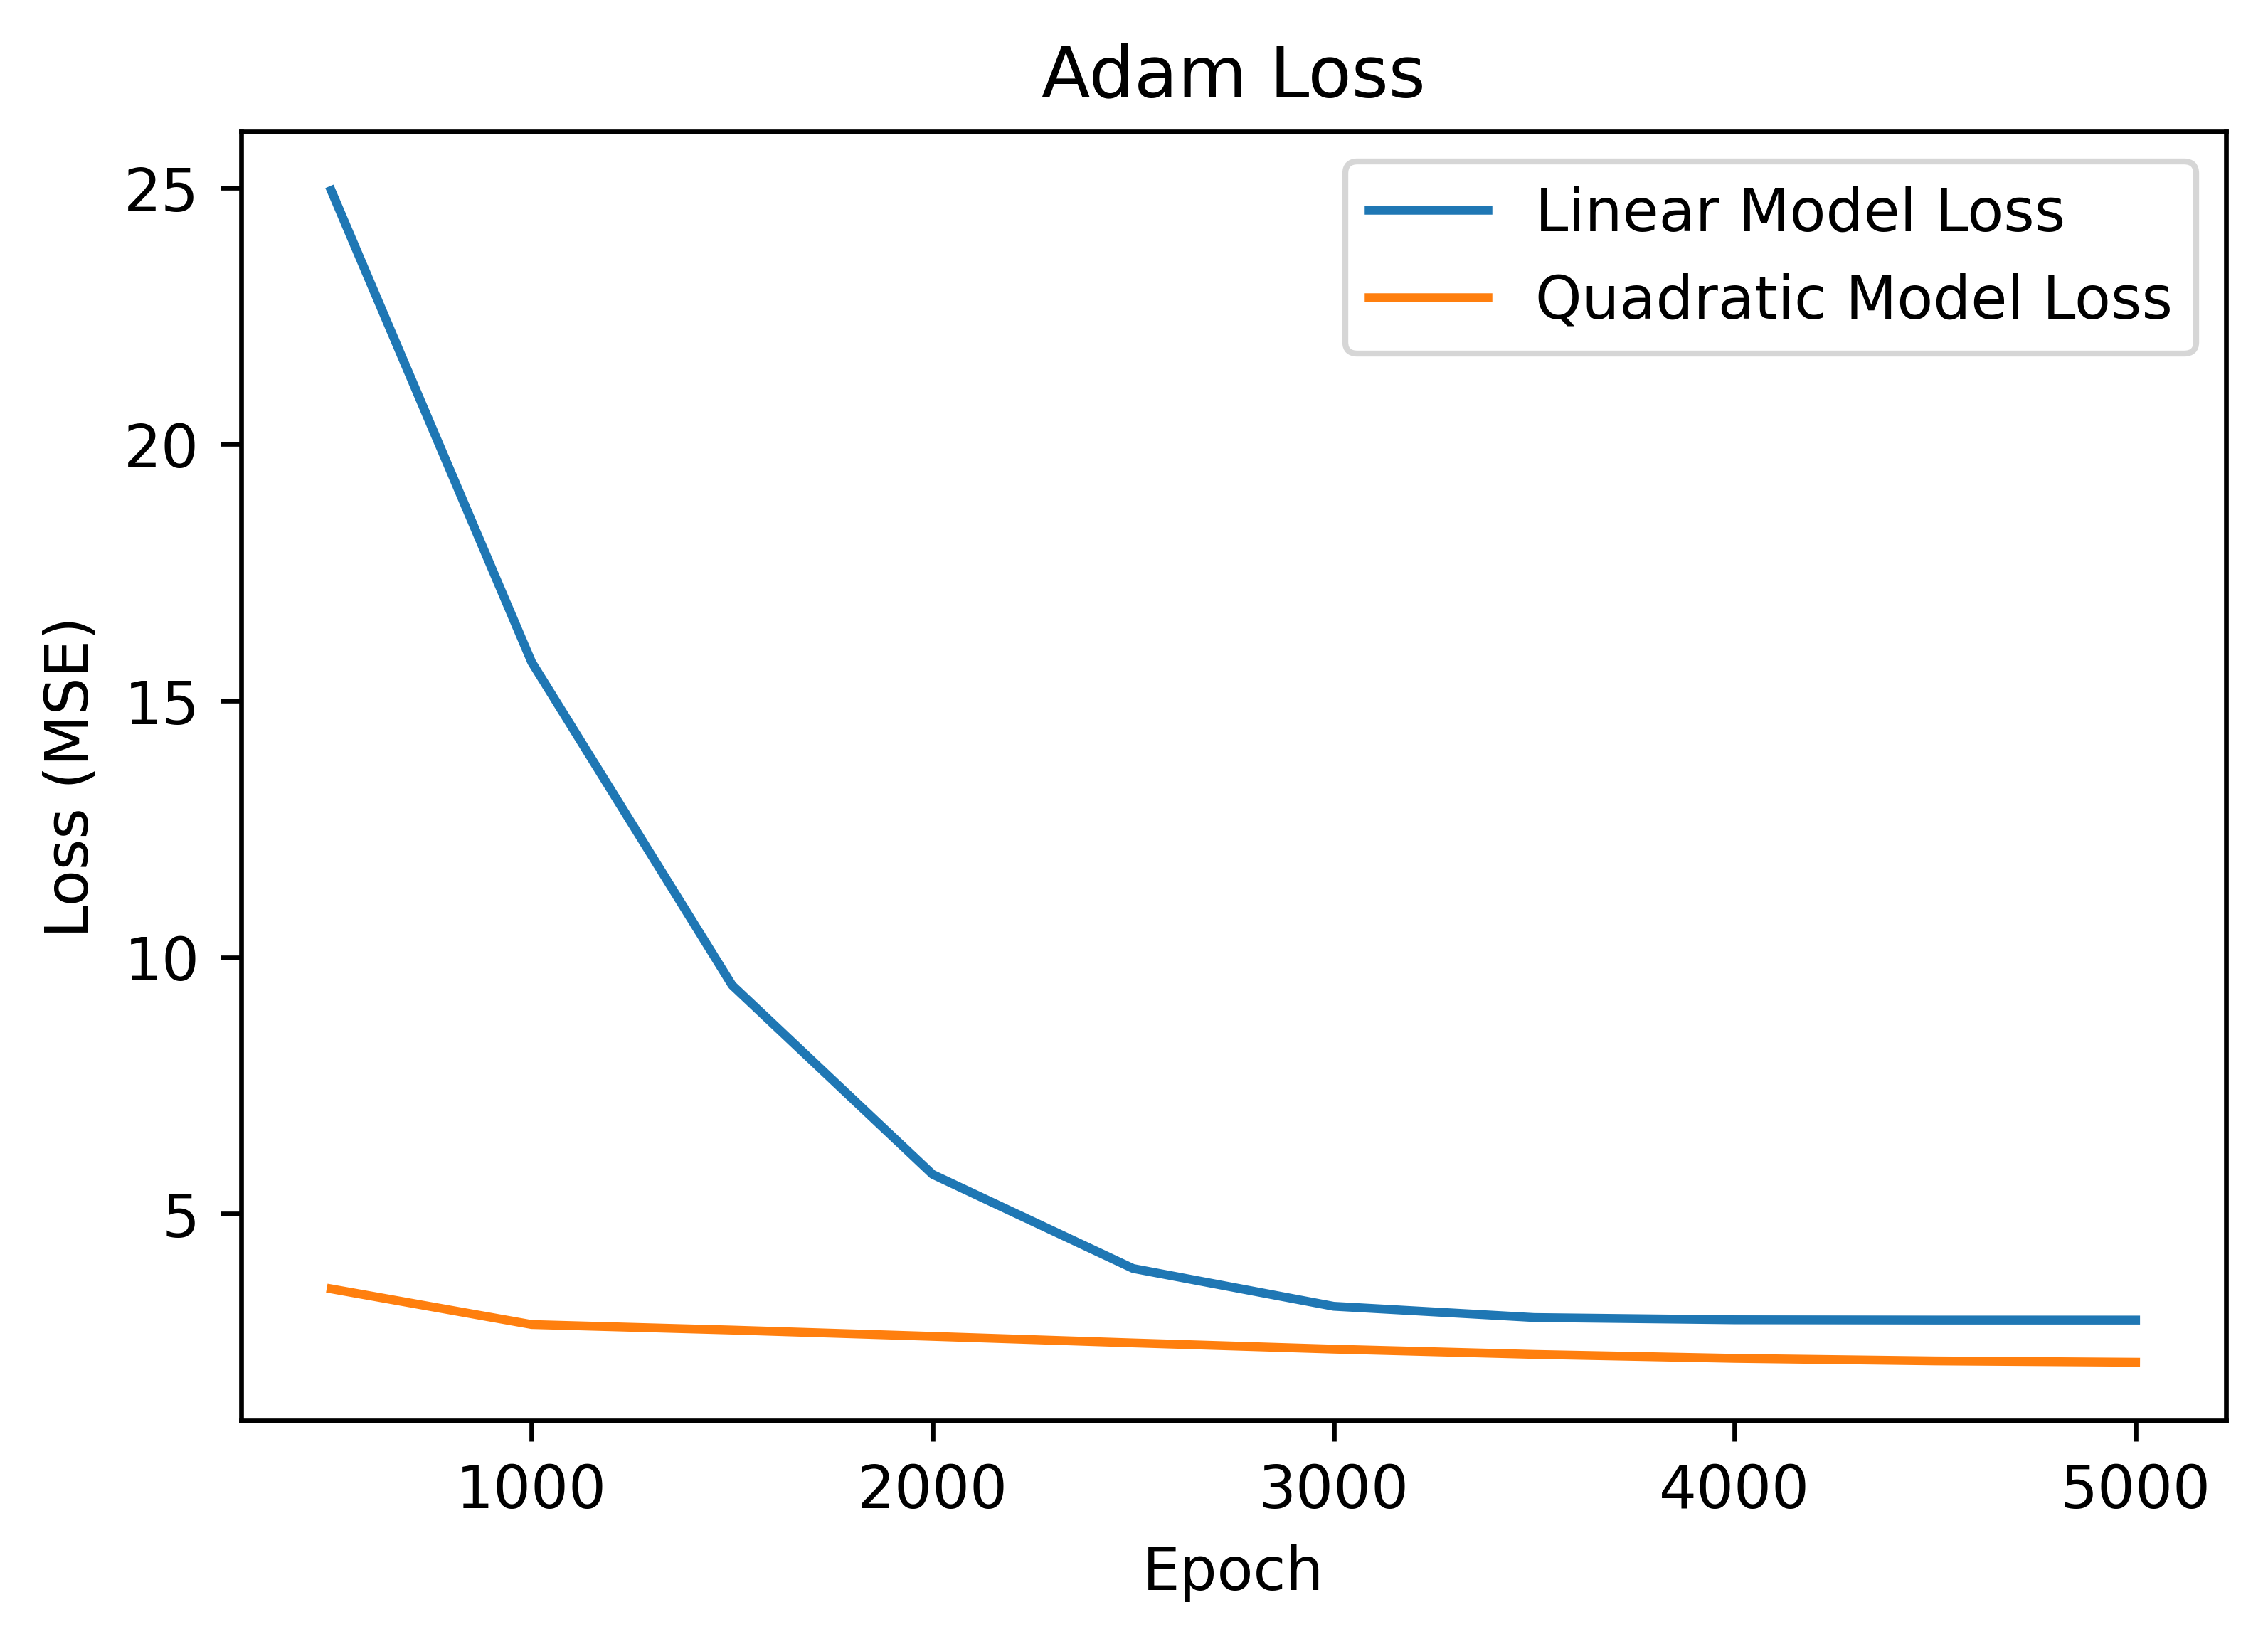

In [21]:
# Set up figure for loss visualization
fig = plt.figure(dpi=600)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
lin, = plt.plot(*zip(*loss_lin_Adam))  # Plot linear loss
quad, = plt.plot(*zip(*loss_quad_Adam)) # Plot quadratic loss
plt.legend([lin, quad], ['Linear Model Loss', 'Quadratic Model Loss'])
plt.title("Adam Loss")
plt.savefig("Adam loss.png", format="png")

# Validation
Extra credit section: modifying training loop to validate the model during training

In [24]:
# Split up the samples into 80/20 training/validation
n_samples = t_u.shape[0]
n_val = int(0.2 * n_samples)

# Shuffle to reduce impact of data correlation on model bias
shuffled_indices = torch.randperm(n_samples)

# Segment dataset indices
train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

In [25]:
# Use the segmented, shuffled indices to build new datasets for training and validating
train_t_u = t_u[train_indices]
train_t_c = t_c[train_indices]

val_t_u = t_u[val_indices]
val_t_c = t_c[val_indices]

train_t_un = 0.1 * train_t_u
val_t_un = 0.1 * val_t_u

In [47]:
# Training loop from textbook with addition of loss tracking
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    losses_train = []
    losses_valid = []
    for epoch in range(1, n_epochs + 1):
        # Run on training data and calculate loss
        train_t_p = model(train_t_u, params)
        train_loss = loss_fn(train_t_p, train_t_c)
        
        # Run on validation data and calculate loss
        val_t_p = model(val_t_u, params)
        val_loss = loss_fn(val_t_p, val_t_c)
        
        # Update model
        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        # Print and store loss information
        if epoch % 500 == 0:
            print(f"Epoch {epoch}, Training loss {train_loss.item():.4f},"
                  f" Validation loss {val_loss.item():.4f}")
            losses_train.append((epoch, train_loss))
            losses_valid.append((epoch, val_loss))
            
    return params, losses_train, losses_valid

## SGD
Run the new training loop on SGD, visualize training and validation loss.

I had to change the hyperparameters (lr and n) experimentally as they weren't converging. At this very large scale (with 10 times as many epochs) it is evident that it still is following similar convergence behavior as the non-validated training, just over much longer time. This is likely because the loss of two datapoints gives the model significantly less information to fit to.

In [56]:
# Run quadratic model validation training with SGD
params = torch.tensor([0.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.8e-7)

params_quad_SGD_new, loss_SGD_train, loss_SGD_valid = training_loop(
    n_epochs = n*10, 
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 500, Training loss 200.7225, Validation loss 232.0984
Epoch 1000, Training loss 195.9050, Validation loss 227.1018
Epoch 1500, Training loss 191.2058, Validation loss 222.2197
Epoch 2000, Training loss 186.6215, Validation loss 217.4500
Epoch 2500, Training loss 182.1495, Validation loss 212.7897
Epoch 3000, Training loss 177.7872, Validation loss 208.2365
Epoch 3500, Training loss 173.5316, Validation loss 203.7879
Epoch 4000, Training loss 169.3803, Validation loss 199.4410
Epoch 4500, Training loss 165.3307, Validation loss 195.1940
Epoch 5000, Training loss 161.3803, Validation loss 191.0441
Epoch 5500, Training loss 157.5266, Validation loss 186.9893
Epoch 6000, Training loss 153.7673, Validation loss 183.0270
Epoch 6500, Training loss 150.1001, Validation loss 179.1553
Epoch 7000, Training loss 146.5228, Validation loss 175.3721
Epoch 7500, Training loss 143.0332, Validation loss 171.6750
Epoch 8000, Training loss 139.6291, Validation loss 168.0623
Epoch 8500, Training loss

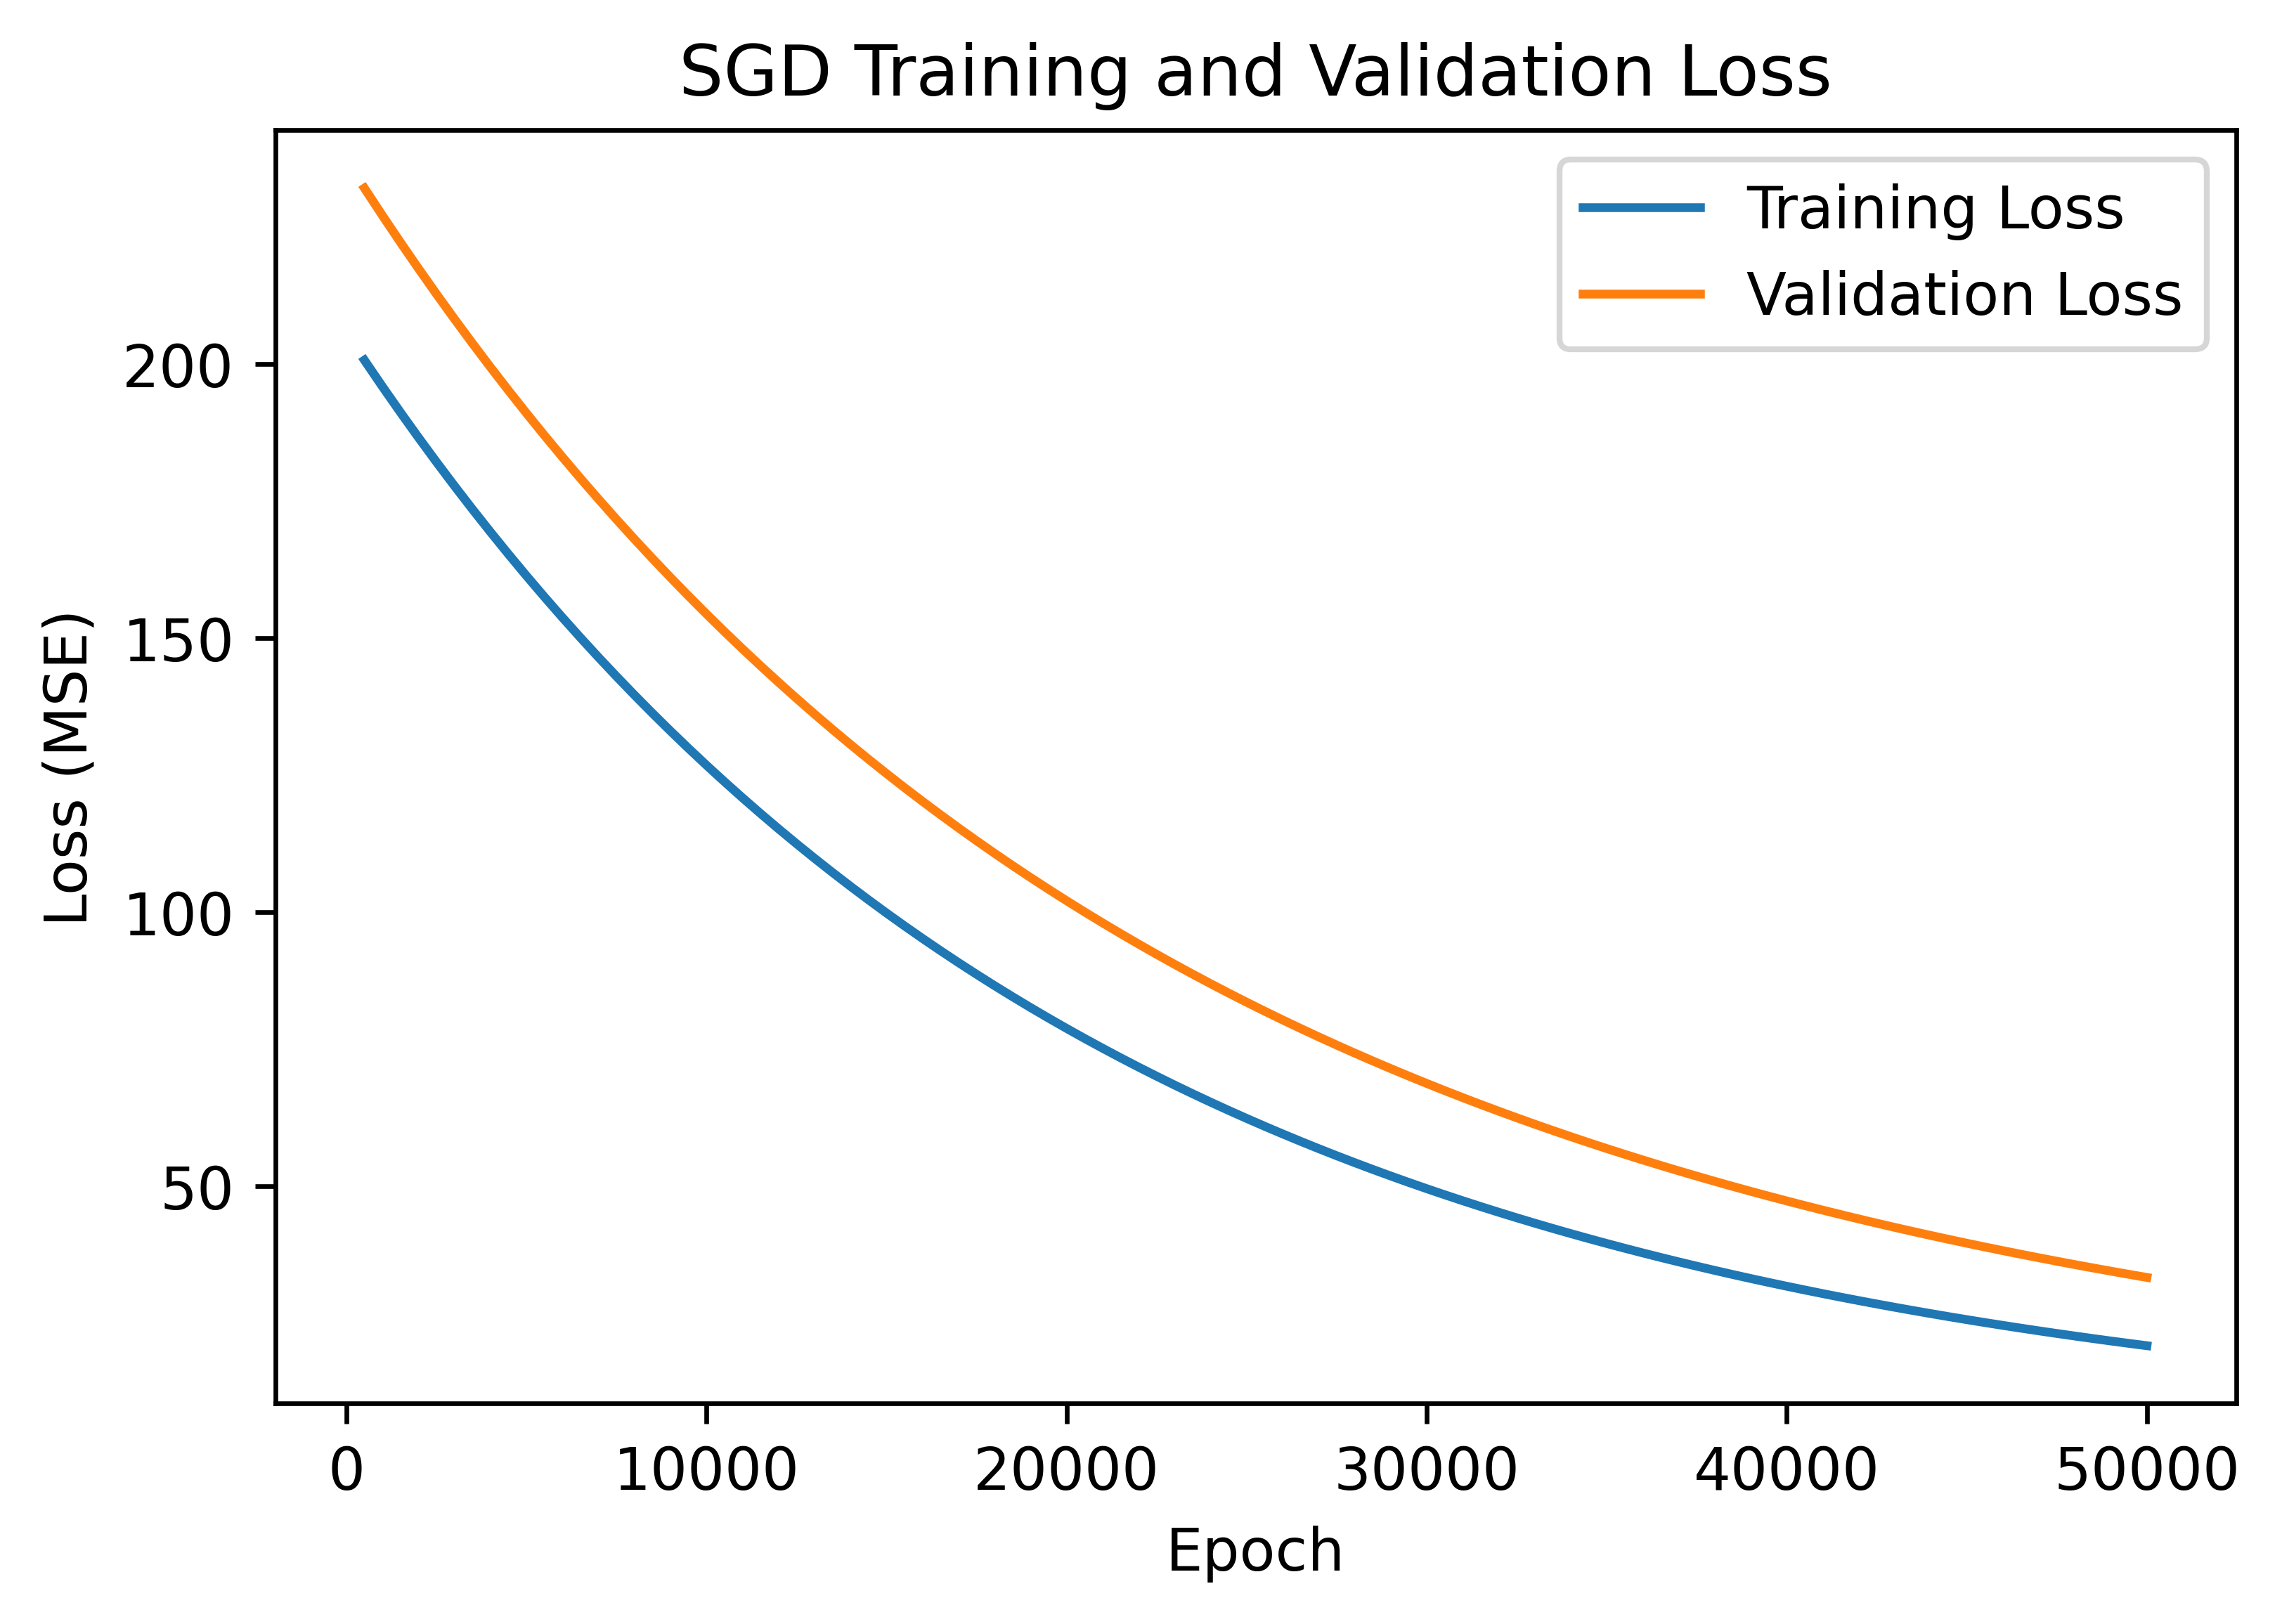

In [57]:
# Set up figure for loss visualization
fig = plt.figure(dpi=600)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
train, = plt.plot(*zip(*loss_SGD_train))  # Plot training loss
valid, = plt.plot(*zip(*loss_SGD_valid)) # Plot validation loss
plt.legend([train, valid], ['Training Loss', 'Validation Loss'])
plt.title("SGD Training and Validation Loss")
plt.savefig("SGD trainval loss.png", format="png")

### Note:
SGD's new training loss was not compared against its non-validated training loss, as the differences in time are so drastic that a graphic would not provide any insight. I interpret this to mean that SGD performs considerably worse with a reduction in its dataset length.

## Adam
Run the new training loop on Adam, visualize training and validation loss.

Surprisingly, this one worked great on the same hyperparameters as in the non-validated case. I'm not familiar enough with the theory of Adam to understand why it would so drastically outperform SGD in this case.

In [64]:
# Run quadratic model validation training with Adam
params = torch.tensor([0.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=lr)

params_quad_Adam_new, loss_Adam_train, loss_Adam_valid = training_loop(
    n_epochs = n, 
    optimizer = optimizer,
    params = params,
    t_u = t_un,
    t_c = t_c)

Epoch 500, Training loss 3.8467, Validation loss 6.1500
Epoch 1000, Training loss 3.2941, Validation loss 3.3590
Epoch 1500, Training loss 3.1948, Validation loss 3.3457
Epoch 2000, Training loss 3.0696, Validation loss 3.3339
Epoch 2500, Training loss 3.2275, Validation loss 2.2583
Epoch 3000, Training loss 2.7957, Validation loss 3.3030
Epoch 3500, Training loss 2.6793, Validation loss 3.5435
Epoch 4000, Training loss 2.5545, Validation loss 3.2878
Epoch 4500, Training loss 11.3273, Validation loss 1.5643
Epoch 5000, Training loss 2.3710, Validation loss 3.2869


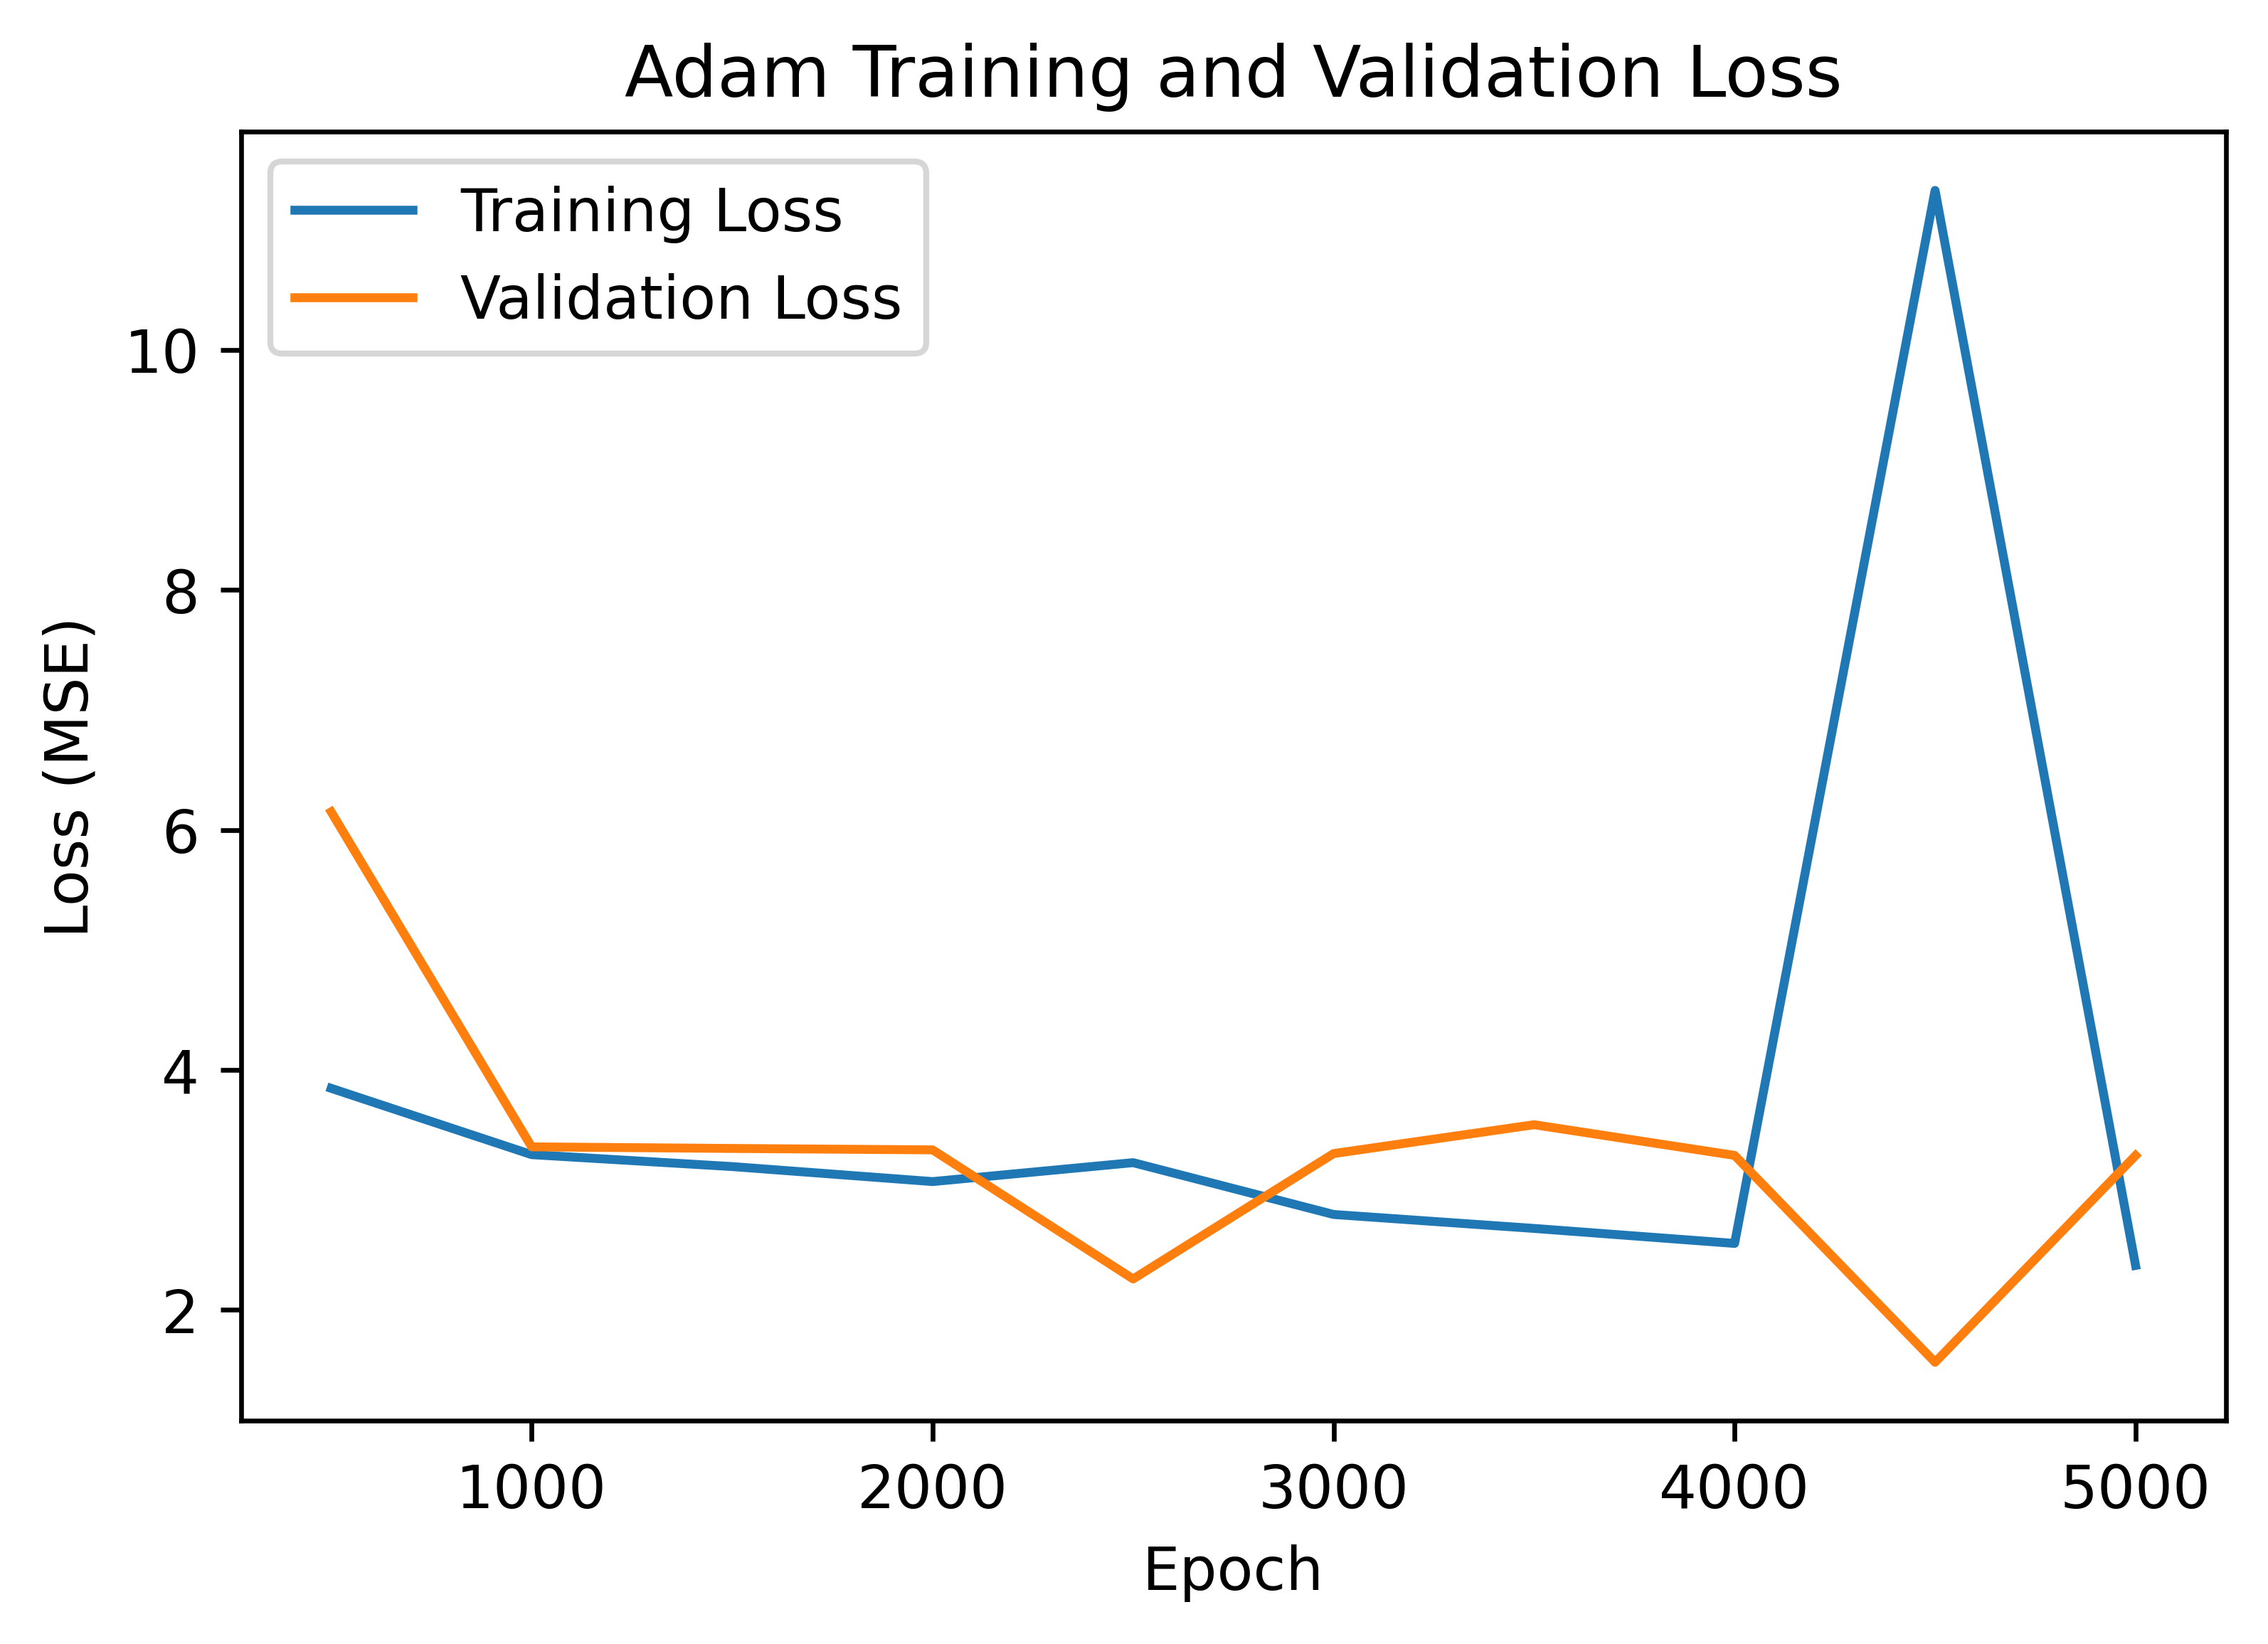

In [65]:
# Set up figure for loss visualization
fig = plt.figure(dpi=600)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
train, = plt.plot(*zip(*loss_Adam_train))  # Plot training loss
valid, = plt.plot(*zip(*loss_Adam_valid)) # Plot validation loss
plt.legend([train, valid], ['Training Loss', 'Validation Loss'])
plt.title("Adam Training and Validation Loss")
plt.savefig("Adam trainval loss.png", format="png")

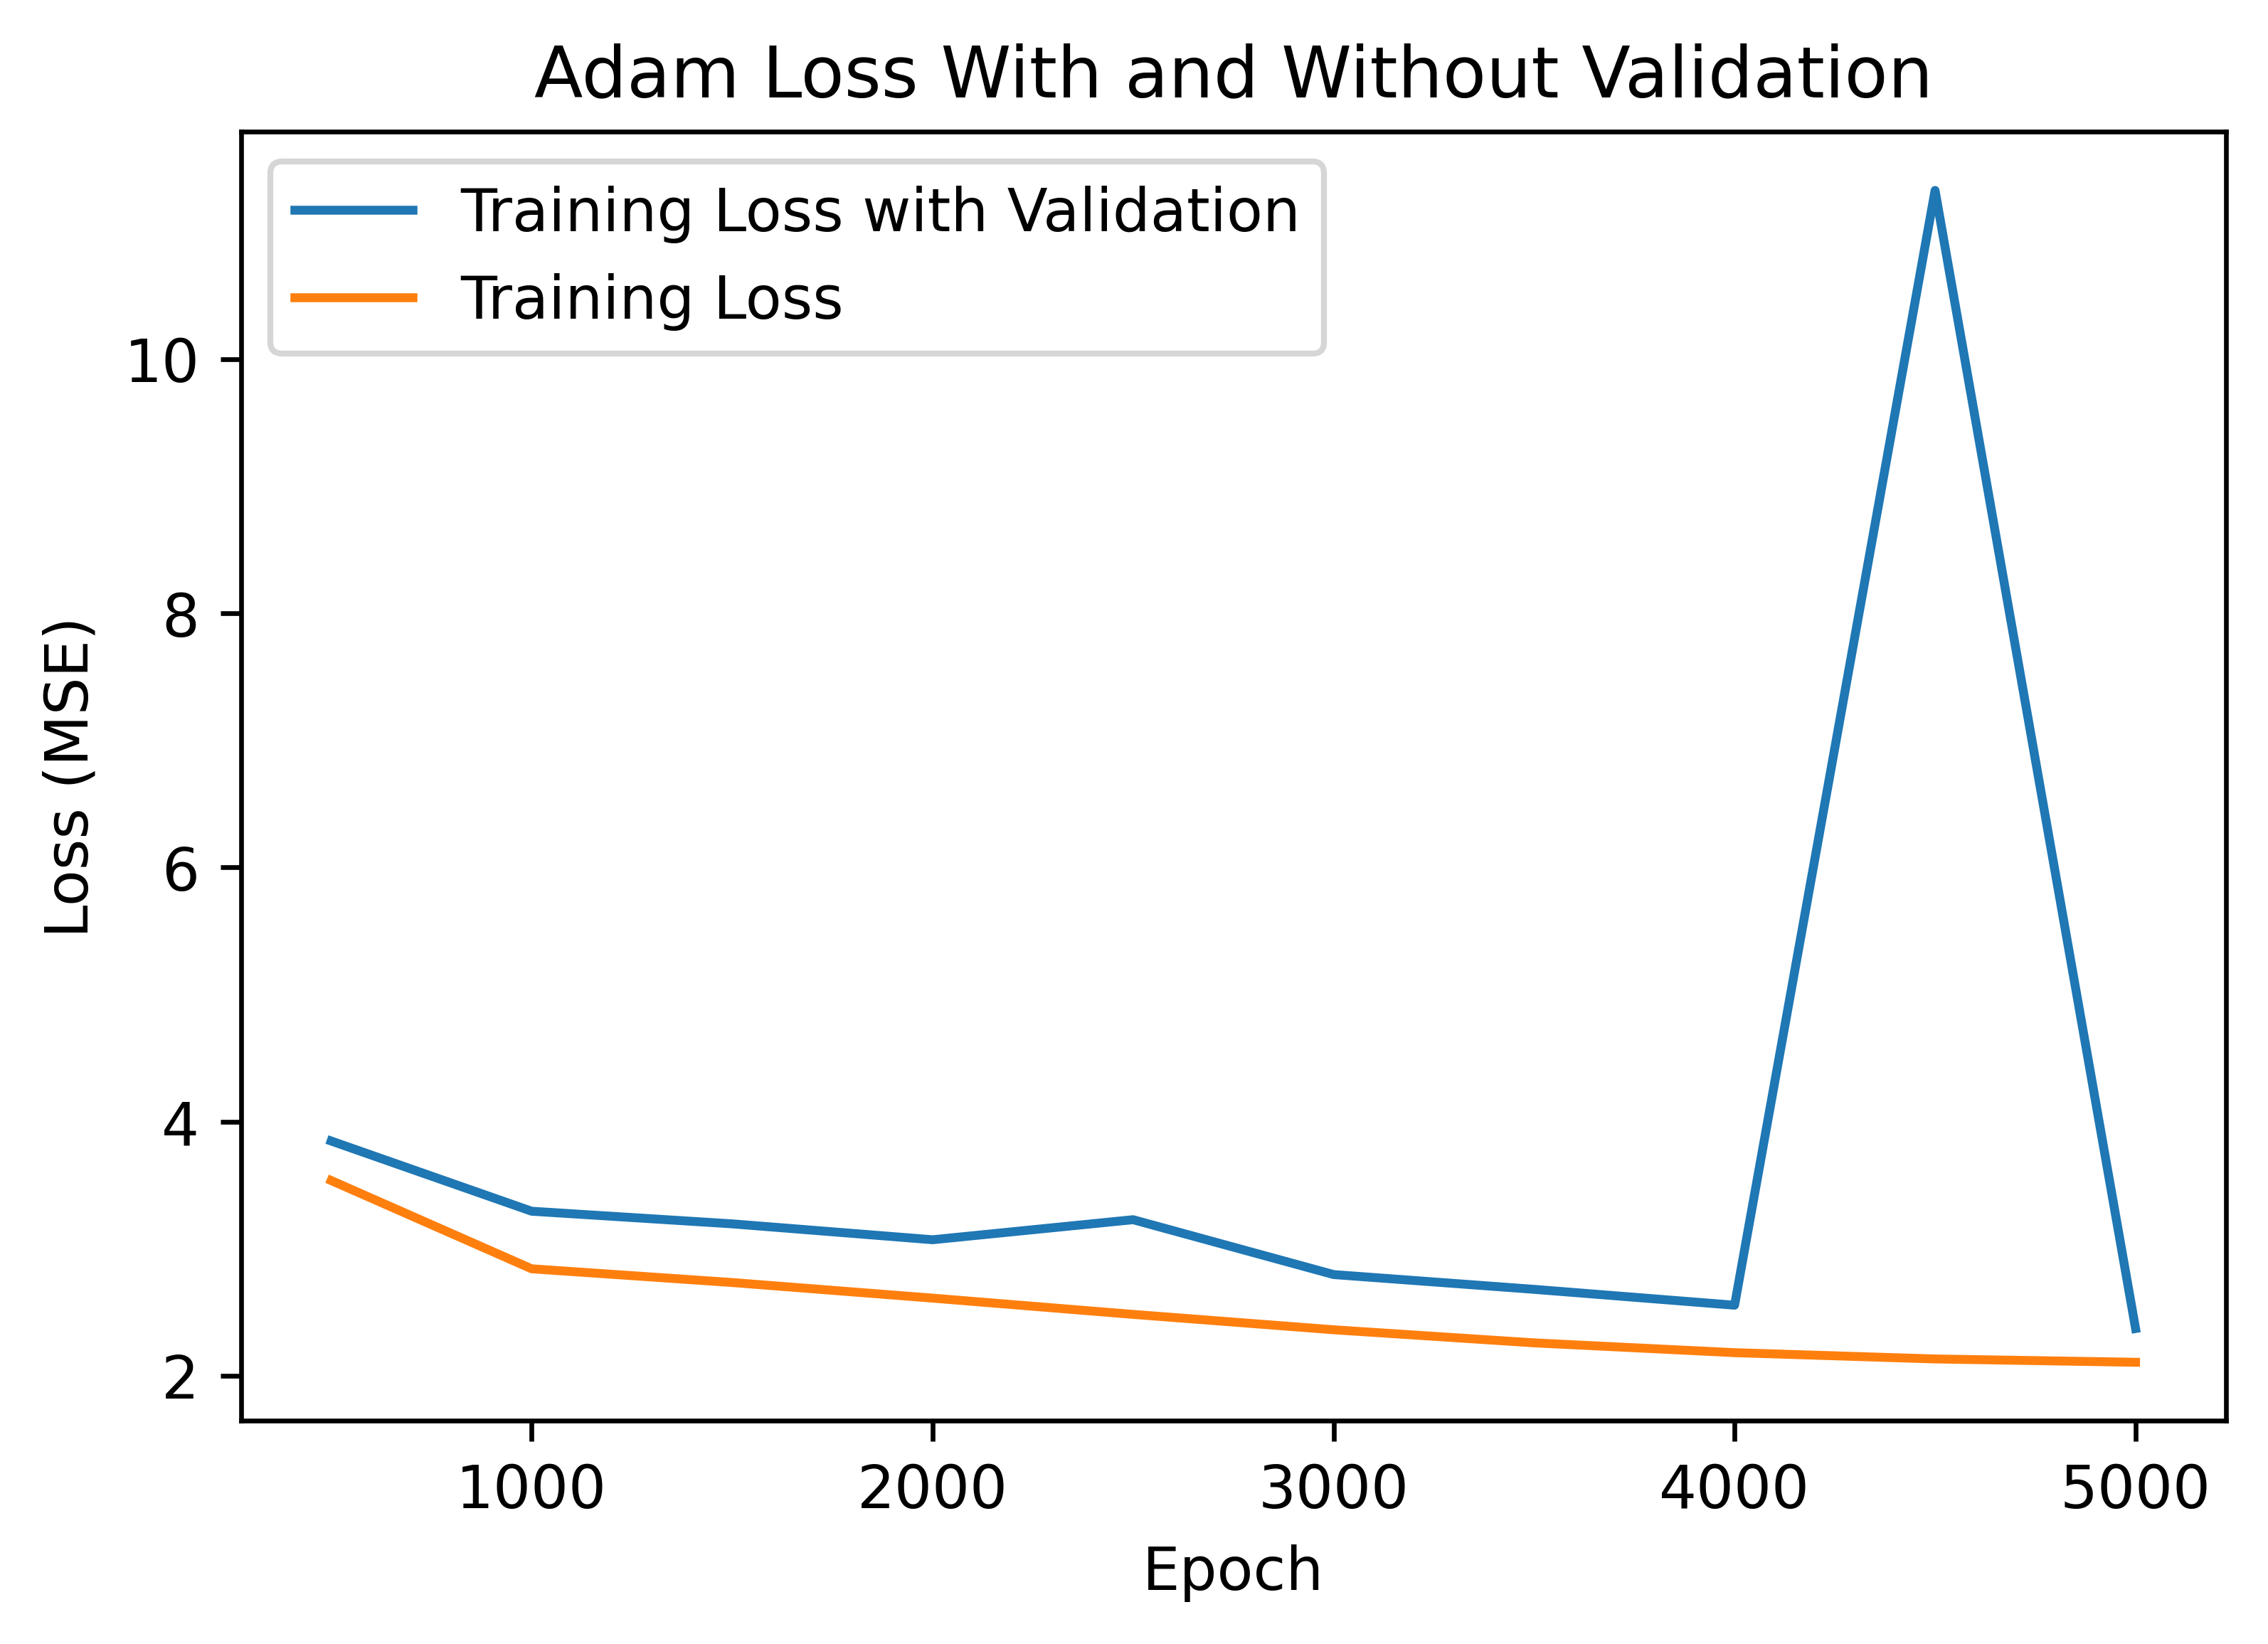

In [66]:
# Compare the new training loss to the earlier one
fig = plt.figure(dpi=600)
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
new, = plt.plot(*zip(*loss_Adam_train))  # Plot training loss
old, = plt.plot(*zip(*loss_quad_Adam)) # Plot validation loss
plt.legend([new, old], ['Training Loss with Validation', 'Training Loss'])
plt.title("Adam Loss With and Without Validation")
plt.savefig("Adam valid loss.png", format="png")